In [1]:
#common imports
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

In [2]:
#load dataset
df = pd.read_csv("Telco.csv")

In [3]:
#check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#look at first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#drop customer ID since it is a unique variable
df.drop(columns = "customerID", axis = 1, inplace = True)

In [4]:
#split categorial and numeric variables for later analysis
cat_df = df.drop(columns = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"], axis = 1)
num_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]

In [5]:
#clean values for graph
df["PaymentMethod"] = df["PaymentMethod"].replace({"Bank transfer (automatic)" : "Bank transfer",
                                                   "Credit card (automatic)" : "Credit card"})

In [6]:
#for now, change data type from int to string so it matches other categorical variables 
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1 : "Yes"})

In [7]:
#change total charges from string to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

In [8]:
#different method to change total charges from string to float since other way did not work
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [9]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#Total Charges has missing values listed, so pull out those rows
df[df["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The customers with missing Total Charges data have a tenure of 0, meaning they are brand new customers. Since brand new customers
would have had an opportunity to end their services, I will drop these values from the dataset.

In [11]:
#drop missing values
df = df.dropna()

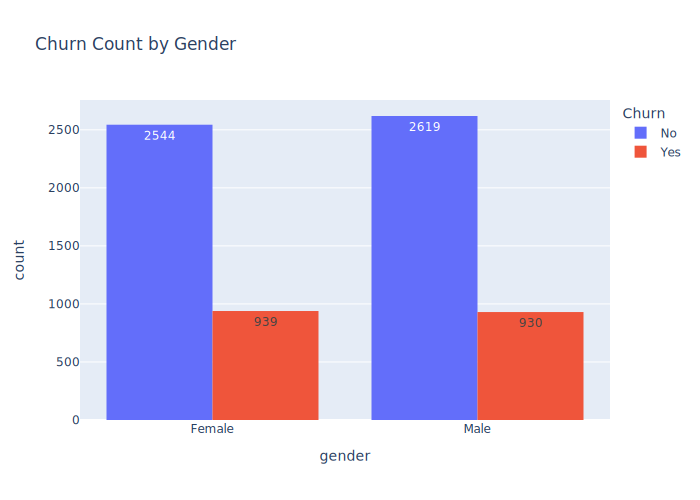

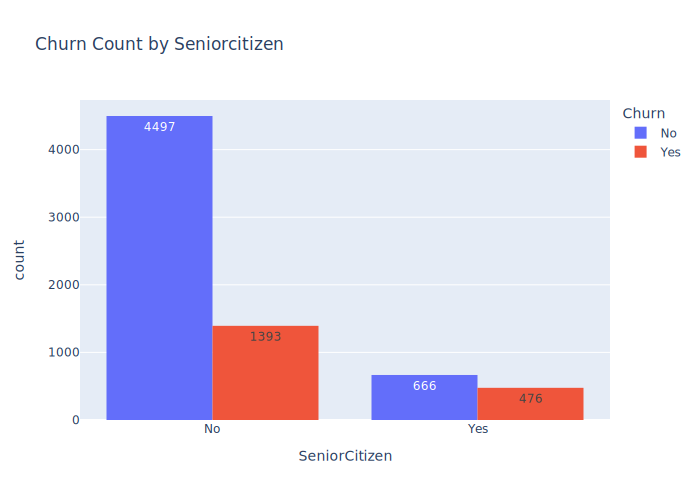

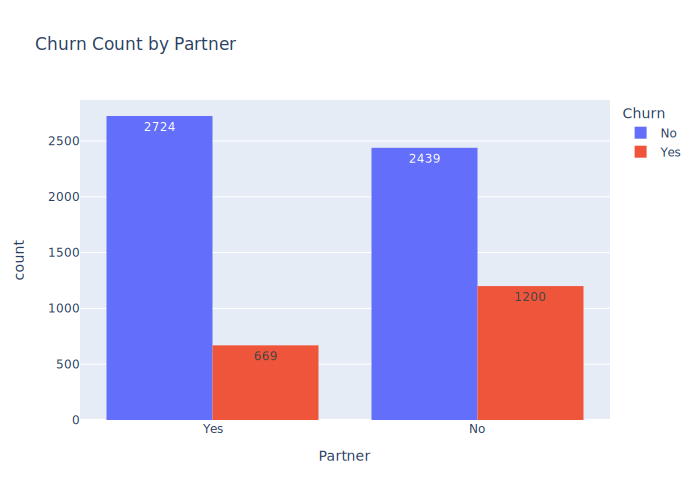

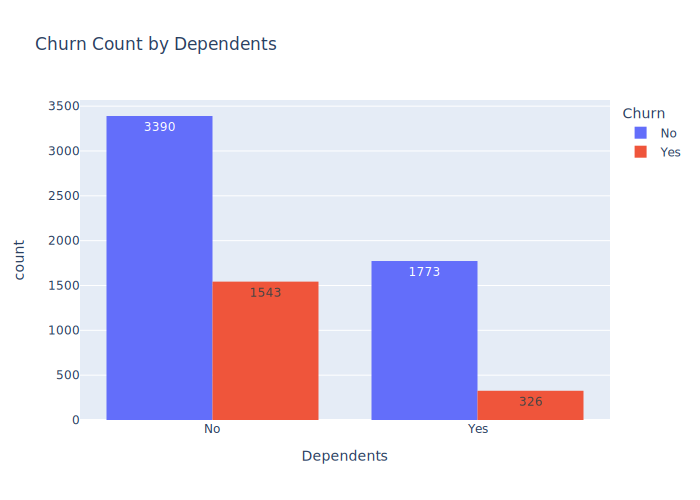

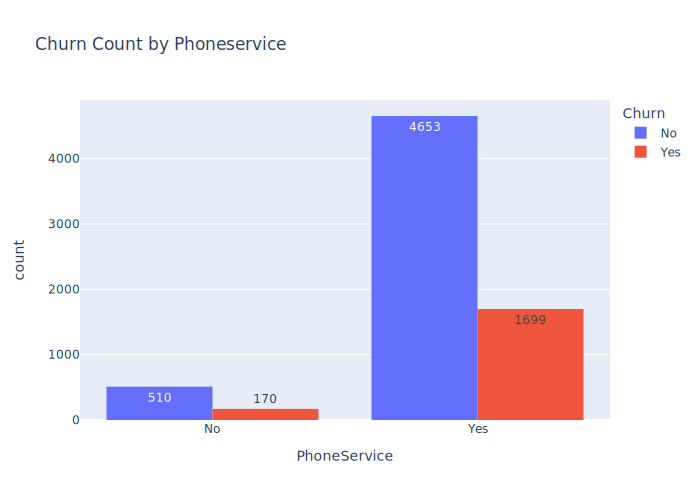

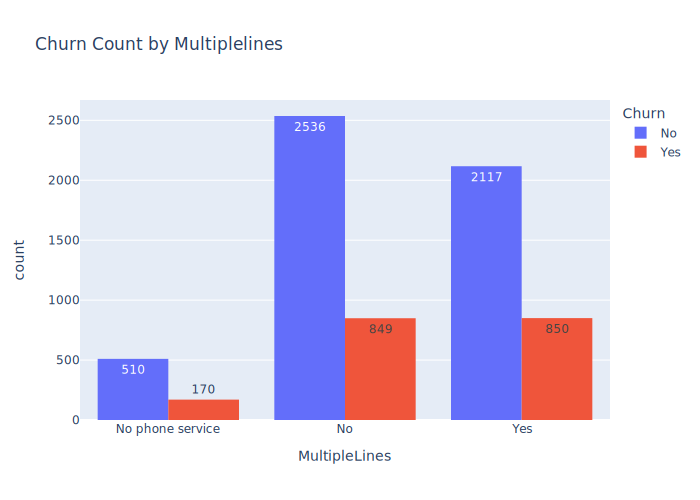

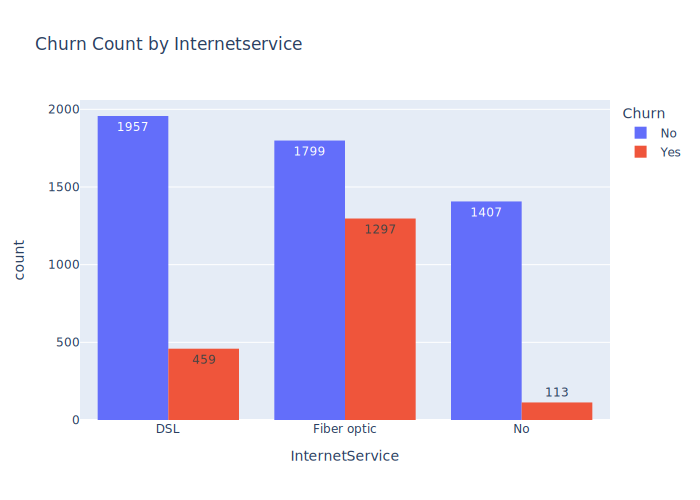

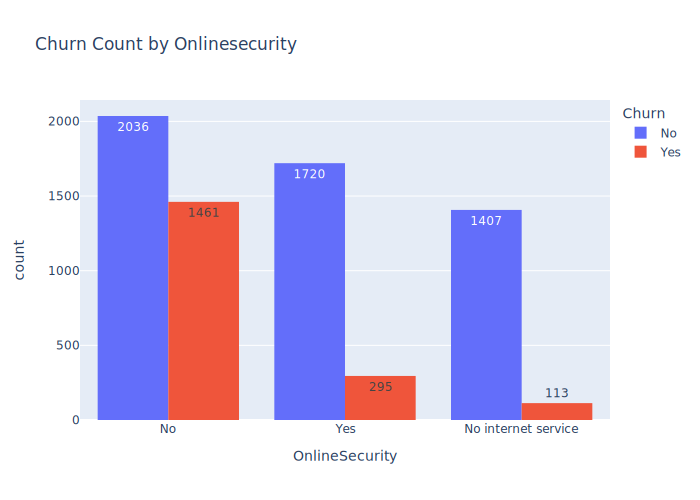

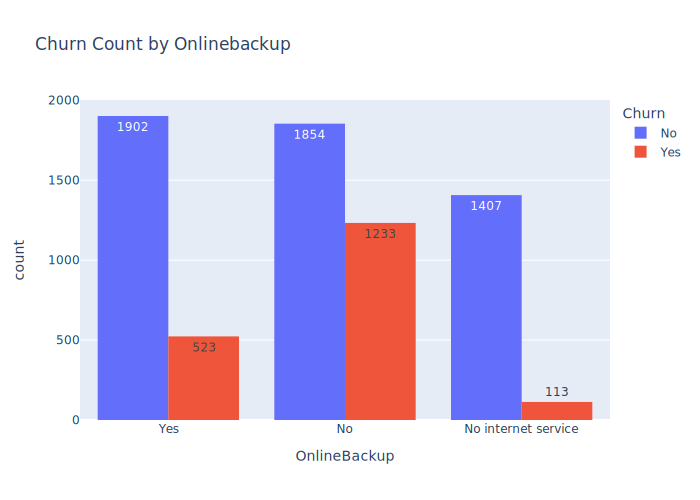

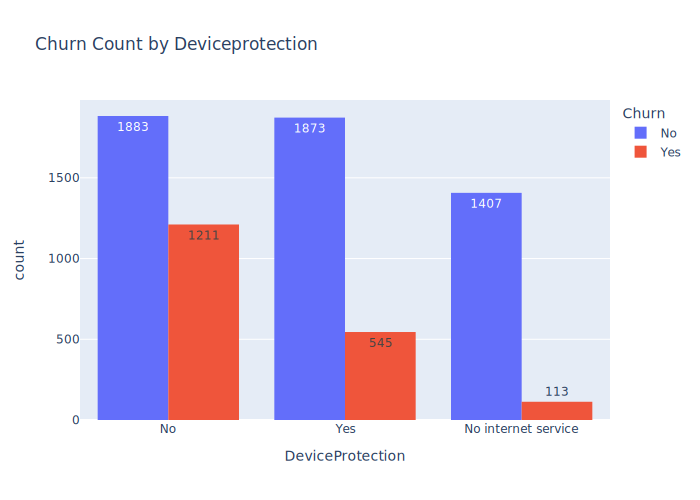

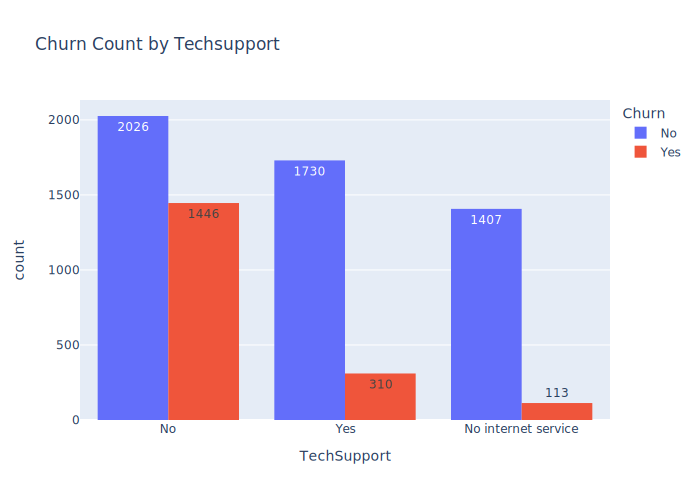

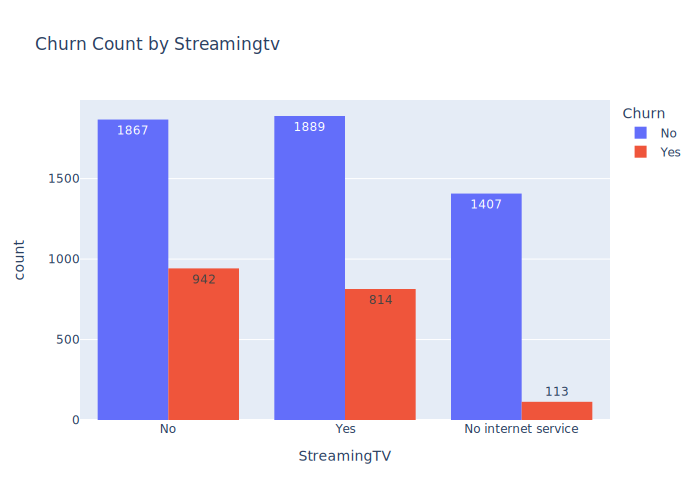

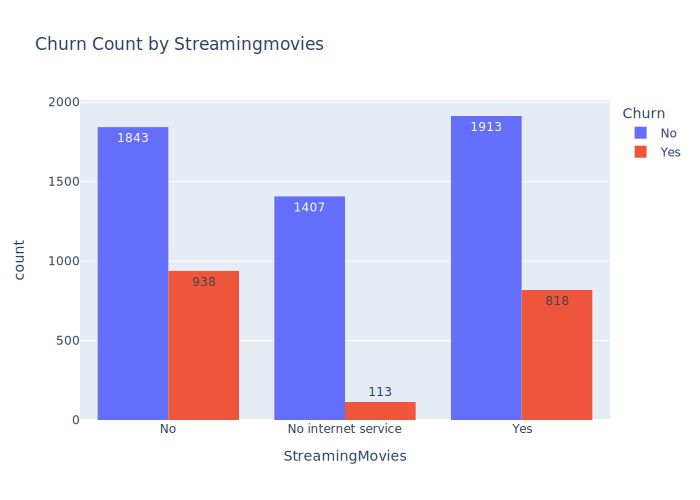

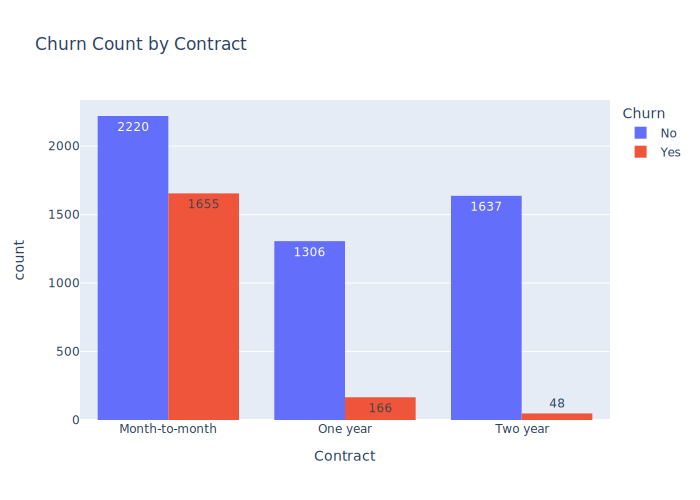

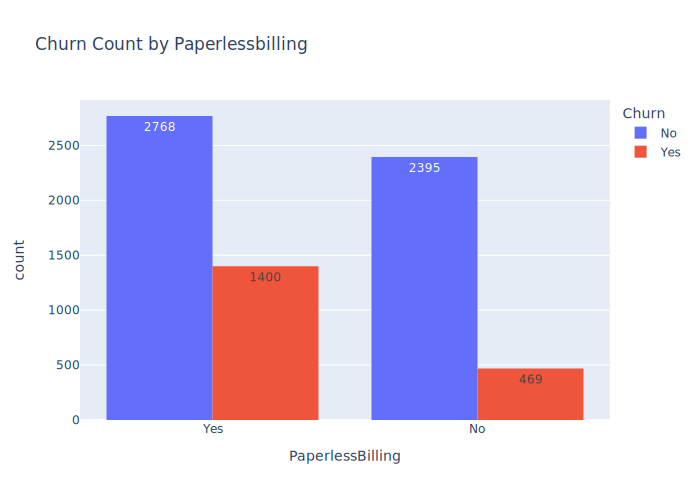

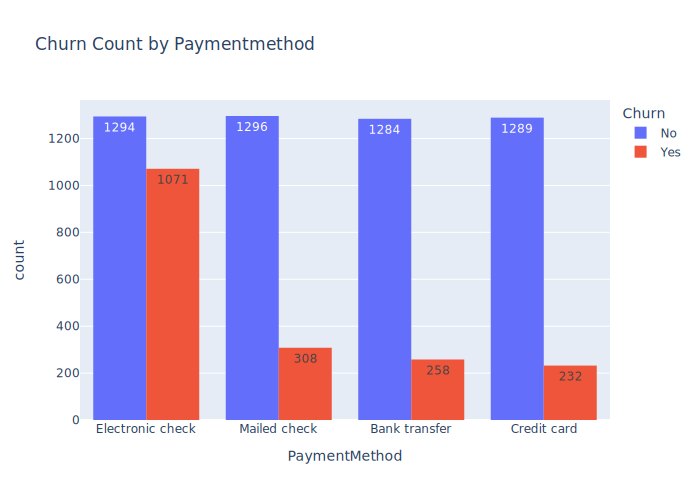

In [12]:
#for all categorical data types, create a histogram to compare Churn count by values
for column in cat_df.columns:
    fig = px.histogram(df, x = column , color = "Churn", title = "Churn Count by " + column.title(), text_auto = True, barmode = "group")
    fig.show()

The graphs above provide information on which factors are more associated with customers churning.
*Senior citizens are more likely to churn than non-senior citizens
*Single people are more likely to churn than those with partners
*Customers without dependents are more likely to churn than those with dependents 
*Most customers have phone service, and those without it are likely to churn
*Customers with Fiber Optic internet are more likely churn, meaning they might be dissastified with that service
*Without additional services such as as Online Security, Backup, etc., customers are more likely to churn.
*Month-to-month contracts have a high churn rate, while one and two-year contracts are low.

In [13]:
#drop gender since it has no impact on churn rate
df = df.drop(columns = "gender", axis = 1)

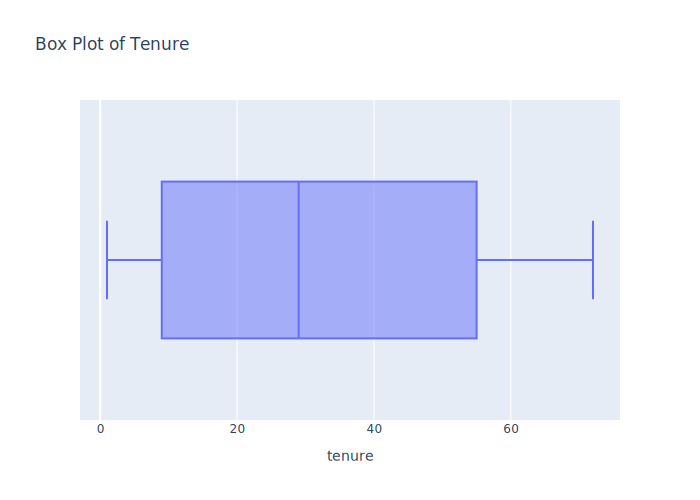

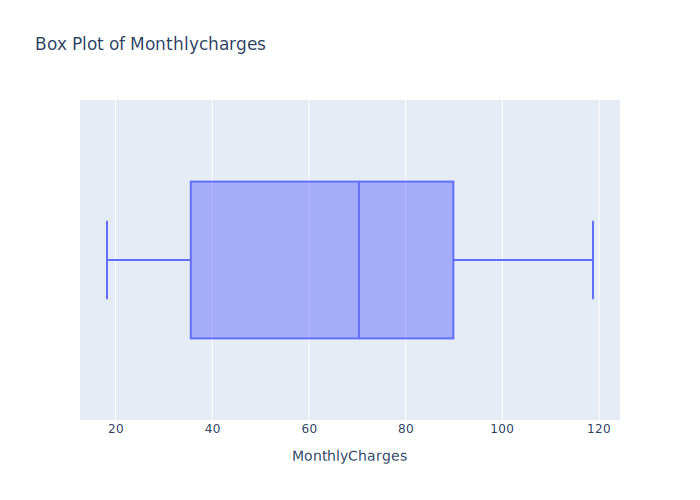

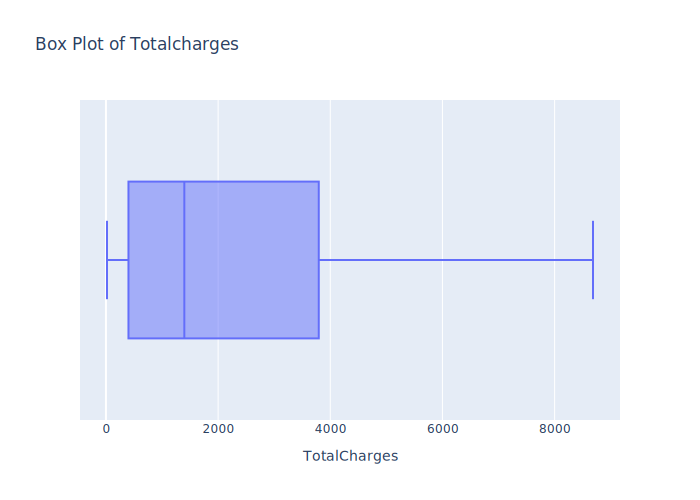

In [14]:
#for all numeric data types, create a boxplot to view the distribution of data
for column in num_df.columns:
    fig = px.box(df, x = column, title = "Box Plot of " + column.title(), points = "suspectedoutliers")
    fig.show()

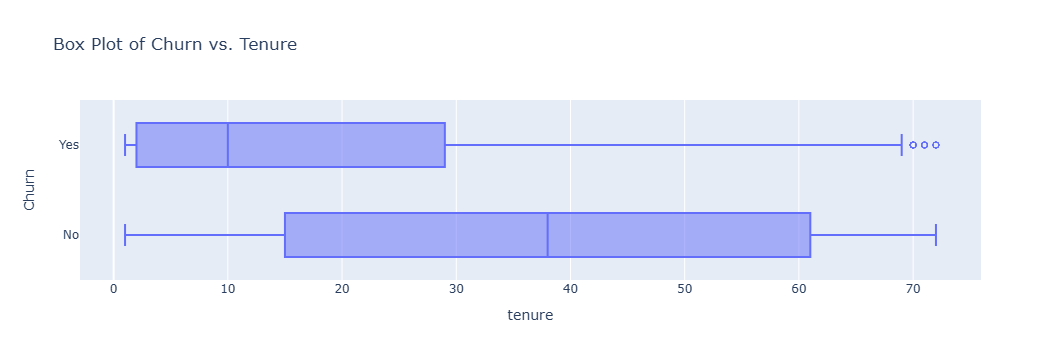

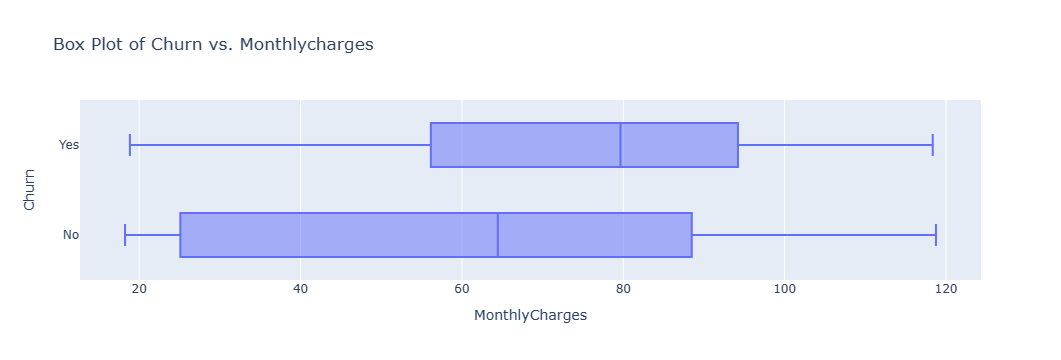

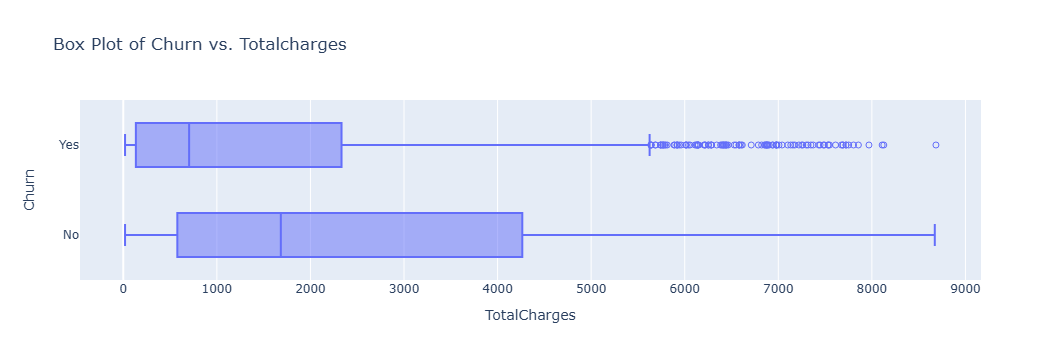

In [20]:
#for numeric data types, create a box plot based on whether customers churned or not
for column in num_df.columns:
    fig = px.box(df, x = column, y= "Churn",  title = "Box Plot of Churn vs. " + column.title(), points = "suspectedoutliers")
    fig.show()

*Customers who churn have a median of 28 fewer months with the company compared to those who have not churned. The median tenure
length for a customer who churns is 10 months.
*Customers who churn have higher median monthly charges
*Total Charges is strongly correlated with tenure, so it reflects similar findings.

In [15]:
#create numeric dataframe to find correlation
num_df2 = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]
num_df2["Churn"] = num_df2["Churn"].replace({"No" : 0, "Yes" : 1})
num_df2.corr()

C:\Users\adaml\AppData\Local\Temp\ipykernel_10288\3839020869.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


Longer tenure is  moderately associated with not churning; higher monthly charges has weak association with churning.

In [16]:
#replace string values with integers for target variable
df["Churn"] = df["Churn"].replace({"No" : 0, "Yes" : 1})

In [24]:
#drop Total Charges because it is highly correlated with Tenure; split data into features (X) and target (y)
X = df.drop(columns = ["Churn", "TotalCharges"], axis = 1)
y = df[["Churn"]]

In [25]:
#split into training & test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [27]:
#check shape of train and test set
X_train.shape

(4922, 17)

In [28]:
X_test.shape

(2110, 17)

In [29]:
#import scaler, random forest classifer, and accuracy score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#put numeric and categorical columns in a list
numeric_features = X.select_dtypes(exclude="object").columns.tolist()
categorical_features = X.select_dtypes(include="object").columns.tolist()

#use pandas get_dummies for encoding categorical variables
X_train_encoded = pd.get_dummies(X_train, columns = categorical_features, dtype = "int", drop_first = True)
X_train = X_train_encoded.copy()


In [30]:
#look at correlation between variables
X_train.corr()

,tenure,MonthlyCharges,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.240537,0.007592,0.387856,0.170036,0.010203,-0.010203,0.323212,0.006906,-0.038679,...,-0.038679,0.279291,-0.038679,0.283738,0.204577,0.565296,-0.004555,0.244036,-0.208824,-0.231095
MonthlyCharges,0.240537,1.000000,0.215182,0.084410,-0.116330,0.245966,-0.245966,0.483014,0.788857,-0.765835,...,-0.765835,0.628474,-0.765835,0.626482,0.002729,-0.076191,0.344734,0.029532,0.270796,-0.382390
SeniorCitizen_Yes,0.007592,0.215182,1.000000,0.018363,-0.207667,0.006960,-0.006960,0.131303,0.246947,-0.179469,...,-0.179469,0.112735,-0.179469,0.116440,-0.047796,-0.119638,0.154523,-0.016766,0.155275,-0.147324
Partner_Yes,0.387856,0.084410,0.018363,1.000000,0.455552,0.026247,-0.026247,0.140745,-0.007723,0.014371,...,0.014371,0.108802,0.014371,0.112257,0.071645,0.264450,-0.025455,0.096296,-0.080309,-0.095643
Dependents_Yes,0.170036,-0.116330,-0.207667,0.455552,1.000000,0.000092,-0.000092,-0.023480,-0.172033,0.136659,...,0.136659,-0.020261,0.136659,-0.043498,0.064548,0.212790,-0.114979,0.061623,-0.144494,0.060791
PhoneService_Yes,0.010203,0.245966,0.006960,0.026247,0.000092,1.000000,-1.000000,0.278976,0.291292,0.175291,...,0.175291,-0.025457,0.175291,-0.040545,-0.009228,0.004030,0.013363,-0.020845,0.011301,-0.002664
MultipleLines_No phone service,-0.010203,-0.245966,-0.006960,-0.026247,-0.000092,-1.000000,1.000000,-0.278976,-0.291292,-0.175291,...,-0.175291,0.025457,-0.175291,0.040545,0.009228,-0.004030,-0.013363,0.020845,-0.011301,0.002664
MultipleLines_Yes,0.323212,0.483014,0.131303,0.140745,-0.023480,0.278976,-0.278976,1.000000,0.361859,-0.202353,...,-0.202353,0.246896,-0.202353,0.257235,-0.017596,0.103295,0.159446,0.055709,0.089826,-0.231837
InternetService_Fiber optic,0.006906,0.788857,0.246947,-0.007723,-0.172033,0.291292,-0.291292,0.361859,1.000000,-0.467127,...,-0.467127,0.335340,-0.467127,0.327394,-0.078669,-0.210389,0.317121,-0.053199,0.330214,-0.302337
InternetService_No,-0.038679,-0.765835,-0.179469,0.014371,0.136659,0.175291,-0.175291,-0.202353,-0.467127,1.000000,...,1.000000,-0.419680,1.000000,-0.423650,0.039819,0.218231,-0.315273,-0.004674,-0.277854,0.330494


In [31]:
#find mutual information scores
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

C:\Users\adaml\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



tenure                                  0.070389
Contract_Two year                       0.056670
InternetService_Fiber optic             0.050966
MonthlyCharges                          0.047245
PaymentMethod_Electronic check          0.043531
InternetService_No                      0.041797
StreamingMovies_No internet service     0.036216
OnlineBackup_No internet service        0.035477
StreamingTV_No internet service         0.035051
DeviceProtection_No internet service    0.033291
OnlineSecurity_No internet service      0.029656
TechSupport_No internet service         0.028049
Contract_One year                       0.027455
TechSupport_Yes                         0.021786
Dependents_Yes                          0.016760
PaperlessBilling_Yes                    0.015858
PaymentMethod_Credit card               0.012981
SeniorCitizen_Yes                       0.010976
OnlineSecurity_Yes                      0.010738
DeviceProtection_Yes                    0.010274
StreamingMovies_Yes 

In [34]:
#drop variables that have 'no internet service', as they have perfect correlation; drop variables
#that have mutual information score of 0
X_train = X_train.drop(columns = ["StreamingMovies_No internet service", "OnlineBackup_No internet service",
                                  "StreamingTV_No internet service", "DeviceProtection_No internet service",
                                  "OnlineSecurity_No internet service", "TechSupport_No internet service",
                                  "OnlineBackup_Yes", "MultipleLines_Yes", "PaymentMethod_Mailed check"], axis = 1)

In [36]:
#standard scaler for numeric variables
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])


In [37]:
#encode categorical variables in testing data
X_test_encoded = pd.get_dummies(X_test, columns = categorical_features, dtype = "int", drop_first = True)
X_test = X_test_encoded.copy()


In [39]:
#drop same values from testing data
X_test = X_test.drop(columns = ["StreamingMovies_No internet service", "OnlineBackup_No internet service",
                                  "StreamingTV_No internet service", "DeviceProtection_No internet service",
                                  "OnlineSecurity_No internet service", "TechSupport_No internet service",
                                  "OnlineBackup_Yes", "MultipleLines_Yes", "PaymentMethod_Mailed check"], axis = 1)

In [40]:
#standard scaler for numeric variables in testing data
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

In [41]:

#run random decision forest model with 100 decision trees
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C:\Users\adaml\AppData\Local\Temp\ipykernel_15964\986333040.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model accuracy score with 100 decision-trees : 0.7777


C:\Users\adaml\AppData\Local\Temp\ipykernel_15964\3986504863.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



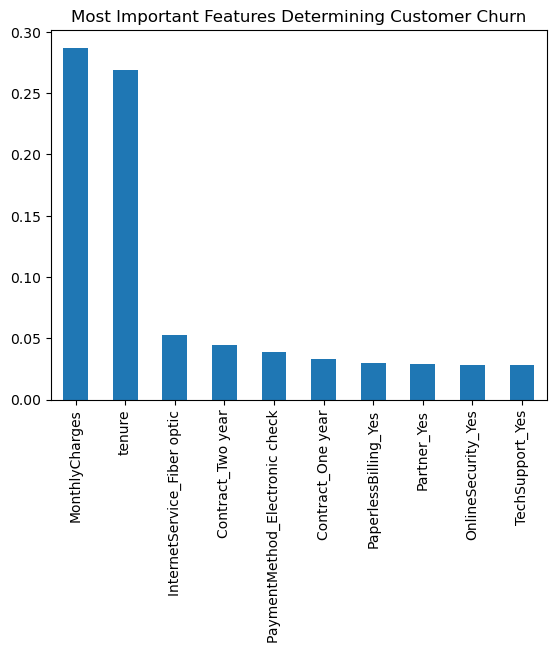

In [42]:
#find most important features for model
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores.head(10).plot(kind="bar", title = "Most Important Features Determining Customer Churn")
plt.show()

The most important features for determining customer churning are monthly charges and tenure. Having Fiber Optic internet 
has a negative impact on customer retention, meaning that service needs to be looked at. Having a one or two-year contract
as opposed to month-to-month has a positive impact of customer retention, as well as having additional services such as online security
and tech support.

The goal should be to get customers to agree to one or two year contracts and some additional services, while keeping monthly 
charges reasonable. 

In [43]:
#run linear regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=42)
model = logreg.fit(X_train, y_train)

C:\Users\adaml\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [44]:
y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score


print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8039
Test set score: 0.7957


In [45]:
y_test.value_counts()

Churn
0        1549
1         561
Name: count, dtype: int64

In [46]:
#check the accuracy score for simply picking the most common value
1549/(561+1549)

0.7341232227488151

The model (.80) is more accurate than simply choosing the more common class (0.73).

In [47]:
#show classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



The model is better at predicting when a customer will not churn as opposed to when a customer will. Because the
model is much better at predicting the majority class, in the future, we could try oversampling to see
if that improves the model, or experiment with the threshold score. 

Previously, I ran both classifiers with dropping any features. The Random Forest Classifier performed slightly better (0.7815 compared
to 0.7777), but the Logistic Regression model performed slighly worse (0.7948 compared to 0.7957). Since the best overall model between the two
was the Logistic Regression model that dropped features, I decided to include only those models. 

In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1362  187]
 [ 282  279]]


Next Steps:

*Try additional classifiers
*Try oversampling to see the impact it has on the models 
